# Multiple linear regression model application

## Step 1: Importing libraries and data

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [2]:
# Read the dataset
auto=pd.read_csv('auto_mpg_dataset.csv')

In [3]:
# Displaying first 5 rows
auto.head()

# mpg: indicates fuel efficiency and it is affected by the weight of the car and engine technology.
# displacement: indicates engine power and performance (import. factor) and it afects the power of the car  
#     larger displacement engines can produce more power and torque, but they may also consume more fuel. 
#     The size and number of cylinders in an engine play a role in determining its displacement.
# Horse power affects acceleration

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [4]:
# General information on the data
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


Expected output:

    The data consists of 398 instances with 9 attributes.
    5 float type, 3 integar type, 1 object type (String)

## Step 2: Checking missing values and outliers

In [5]:
# Checking missing values
auto.isna().apply(pd.value_counts)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
False,398,398,398,398,398,398,398,398,398


Expected output:

    No missing data

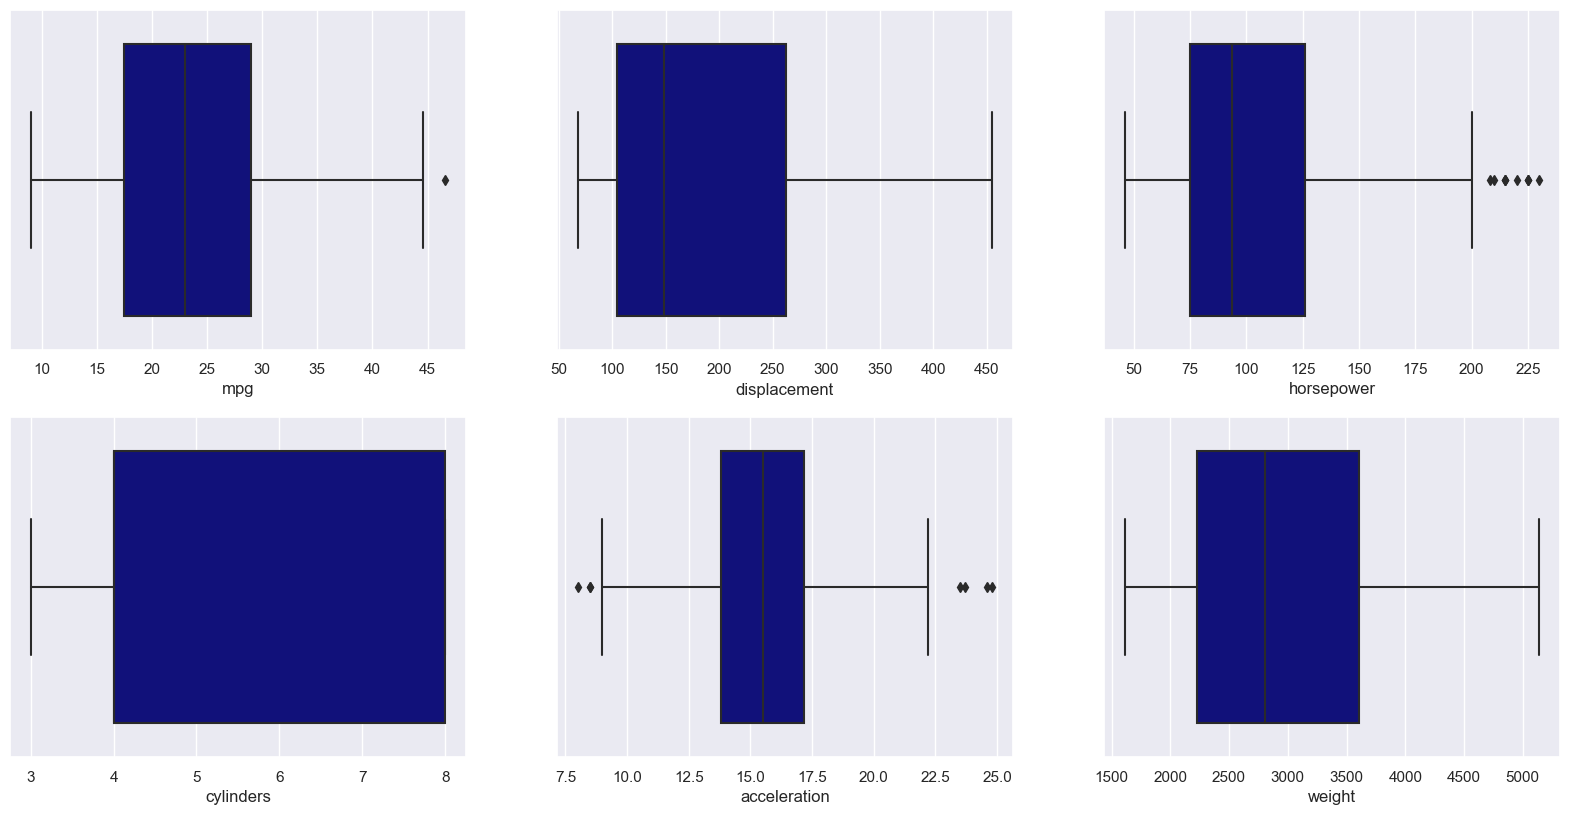

In [79]:
# Checking outliers from boxplot
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= auto.mpg ,color='darkblue')

plt.subplot(3,3,2)
sns.boxplot(x= auto.displacement, color='darkblue')

plt.subplot(3,3,3)
sns.boxplot(x= auto.horsepower, color='darkblue')

plt.subplot(3,3,4)
sns.boxplot(x= auto.cylinders, color='darkblue')

plt.subplot(3,3,5)
sns.boxplot(x= auto.acceleration, color='darkblue')

plt.subplot(3,3,6)
sns.boxplot(x= auto.weight, color='darkblue')

plt.show()

Expected outputs:

    horse power contains some outliers that neede to be removed
    acceleration also contains some outliers

In [13]:
# A brief summary of the dataset
auto.describe().T

,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,-1404.643216,12213.424763,-100000.0,75.000,92.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


Expected output:

    horse power contain some extreme negative values need to be removed
    displacement is skewed

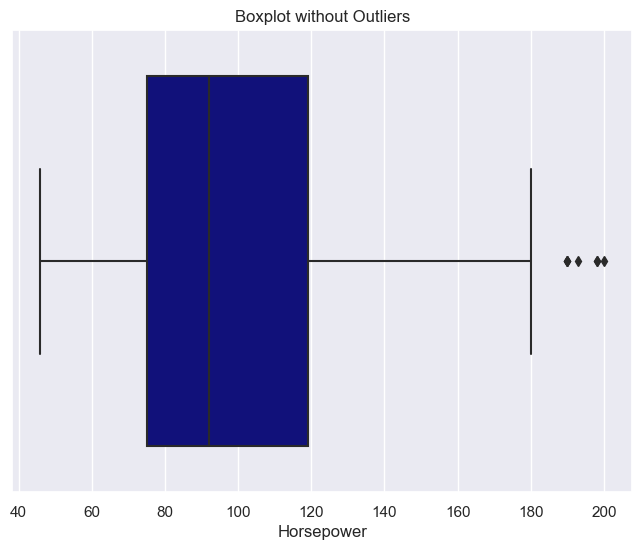

Lower bound: -1.5
Upper bound: 202.5
Outliers:
     cylinders  displacement  horsepower  weight  acceleration  model_year  \
6            8         454.0       220.0  4354.0           9.0          70   
7            8         440.0       215.0  4312.0           8.5          70   
8            8         455.0       225.0  4425.0          10.0          70   
13           8         455.0       225.0  3086.0          10.0          70   
25           8         360.0       215.0  4615.0          14.0          70   
27           8         318.0       210.0  4382.0          13.5          70   
67           8         429.0       208.0  4633.0          11.0          72   
94           8         440.0       215.0  4735.0          11.0          73   
95           8         455.0       225.0  4951.0          11.0          73   
116          8         400.0       230.0  4278.0           9.5          73   

     origin                      car_name   mpg  
6         1              chevrolet impala  1

In [80]:
# Calculate quartiles
quartiles = auto['horsepower'].quantile([0.25, 0.5, 0.75])
Q1 = quartiles[0.25]  # 1st quartile (25th percentile)
Q3 = quartiles[0.75]  # 3rd quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = auto[(auto['horsepower'] < lower_bound) | (auto['horsepower'] > upper_bound)]

# Remove outliers from the DataFrame
auto_no_outliers = auto[(auto['horsepower'] >= lower_bound) & (auto['horsepower'] <= upper_bound)]

# Visualize using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=auto_no_outliers['horsepower'],color='darkblue')
plt.title("Boxplot without Outliers")
plt.xlabel("Horsepower")
plt.show()

# Print the identified outliers
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Outliers:")
print(outliers)

<AxesSubplot:xlabel='horsepower'>

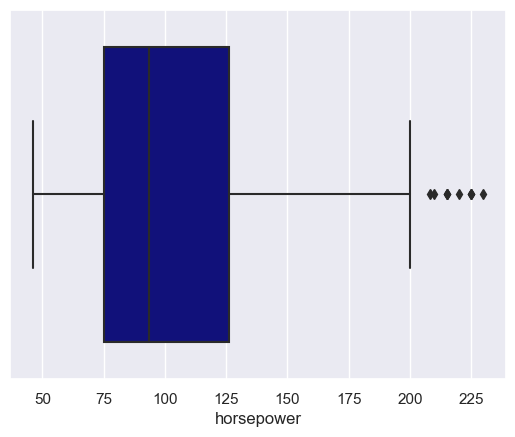

In [92]:
# After removing the negative values in horse power
def remove_negative(x):
    if x<=0 :
        x=np.nan
    else:
        return x

auto['horsepower']=auto['horsepower'].apply(lambda x: remove_negative(x))
auto.dropna(inplace=True)
sns.boxplot(x=auto['horsepower'],color='darkblue')

## Step 3: creating visual methods to analyze the data

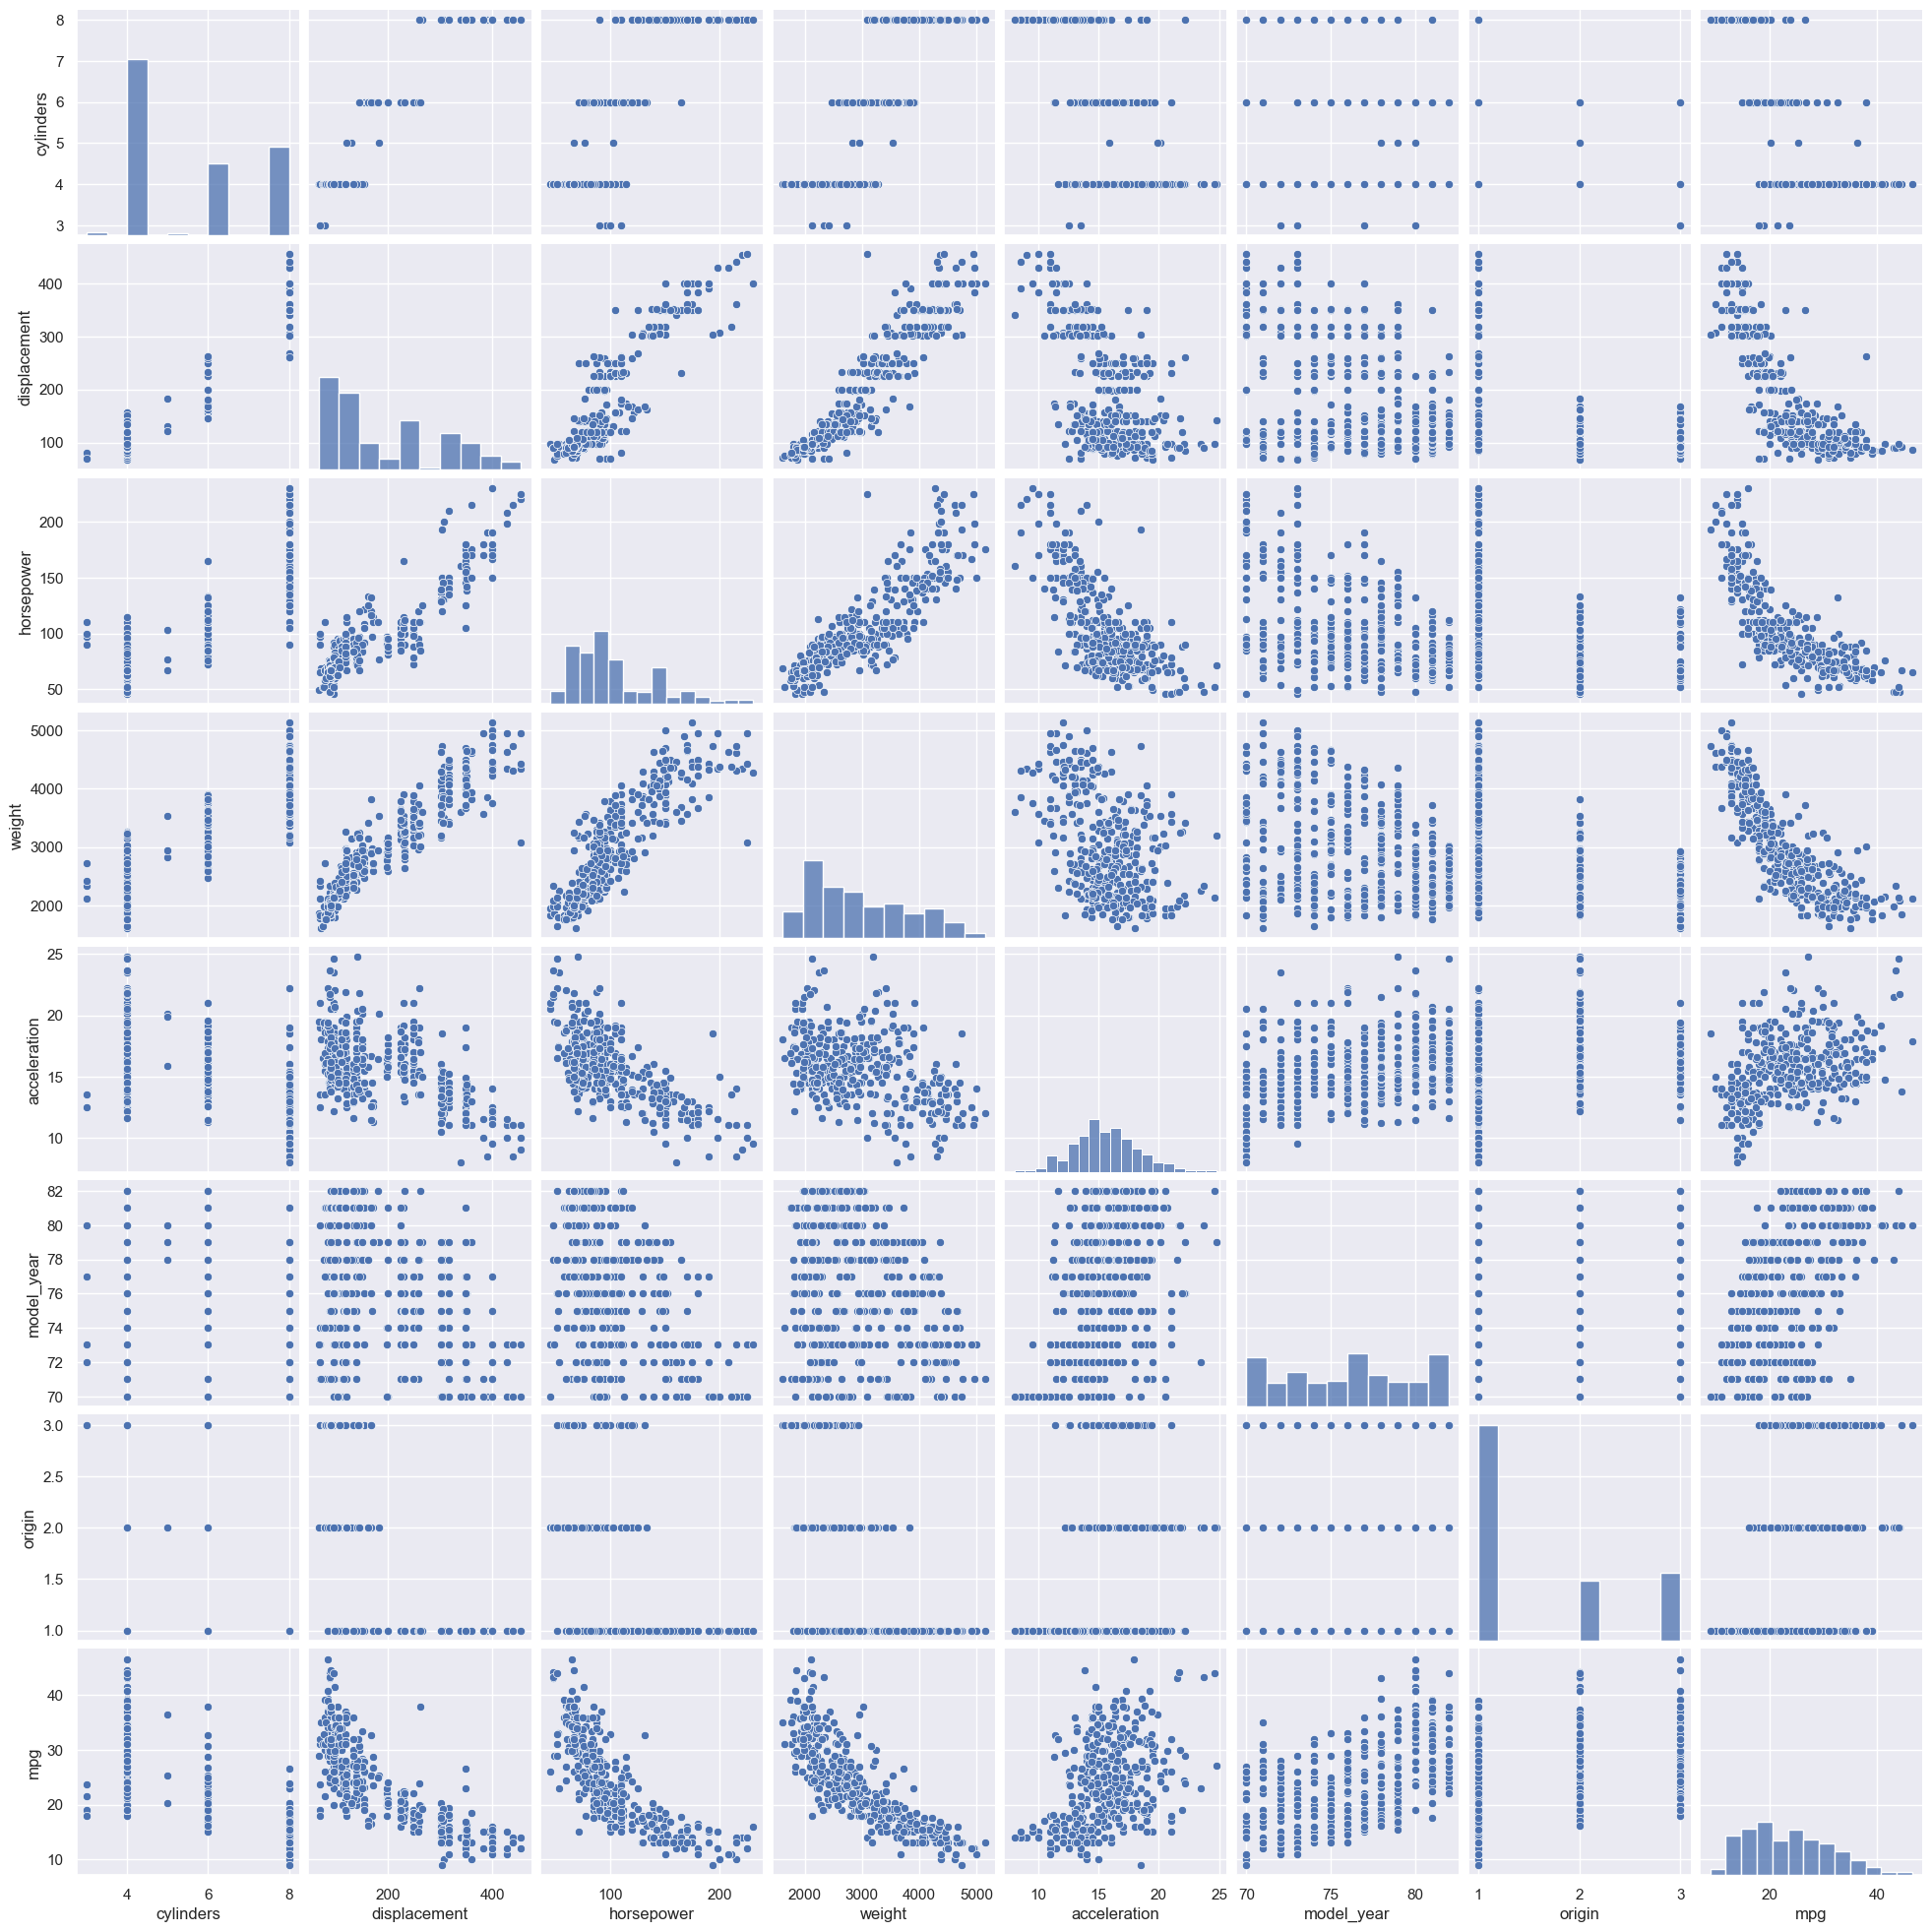

In [81]:
sns.pairplot(data=auto)

In [53]:
auto.corr()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
displacement,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.778427
weight,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873,0.420289
model_year,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450,1.000000


<AxesSubplot:>

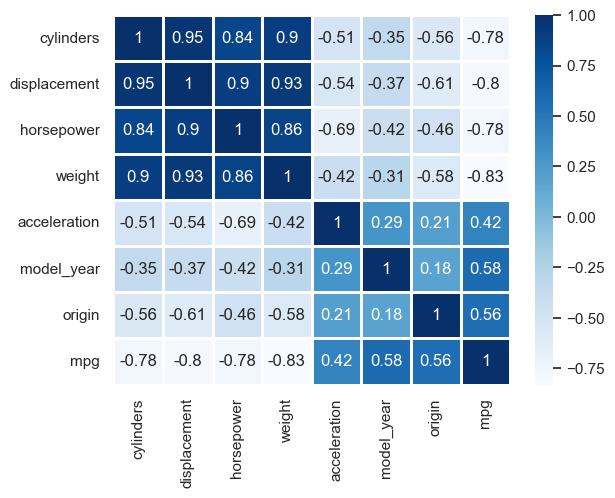

In [82]:
sns.heatmap(auto.corr(),annot=True,linecolor='white',linewidths=1,cmap='Blues')

Expected output:

    i have a correlation between mpg and (weight,horsepower,displacement,cylinders)

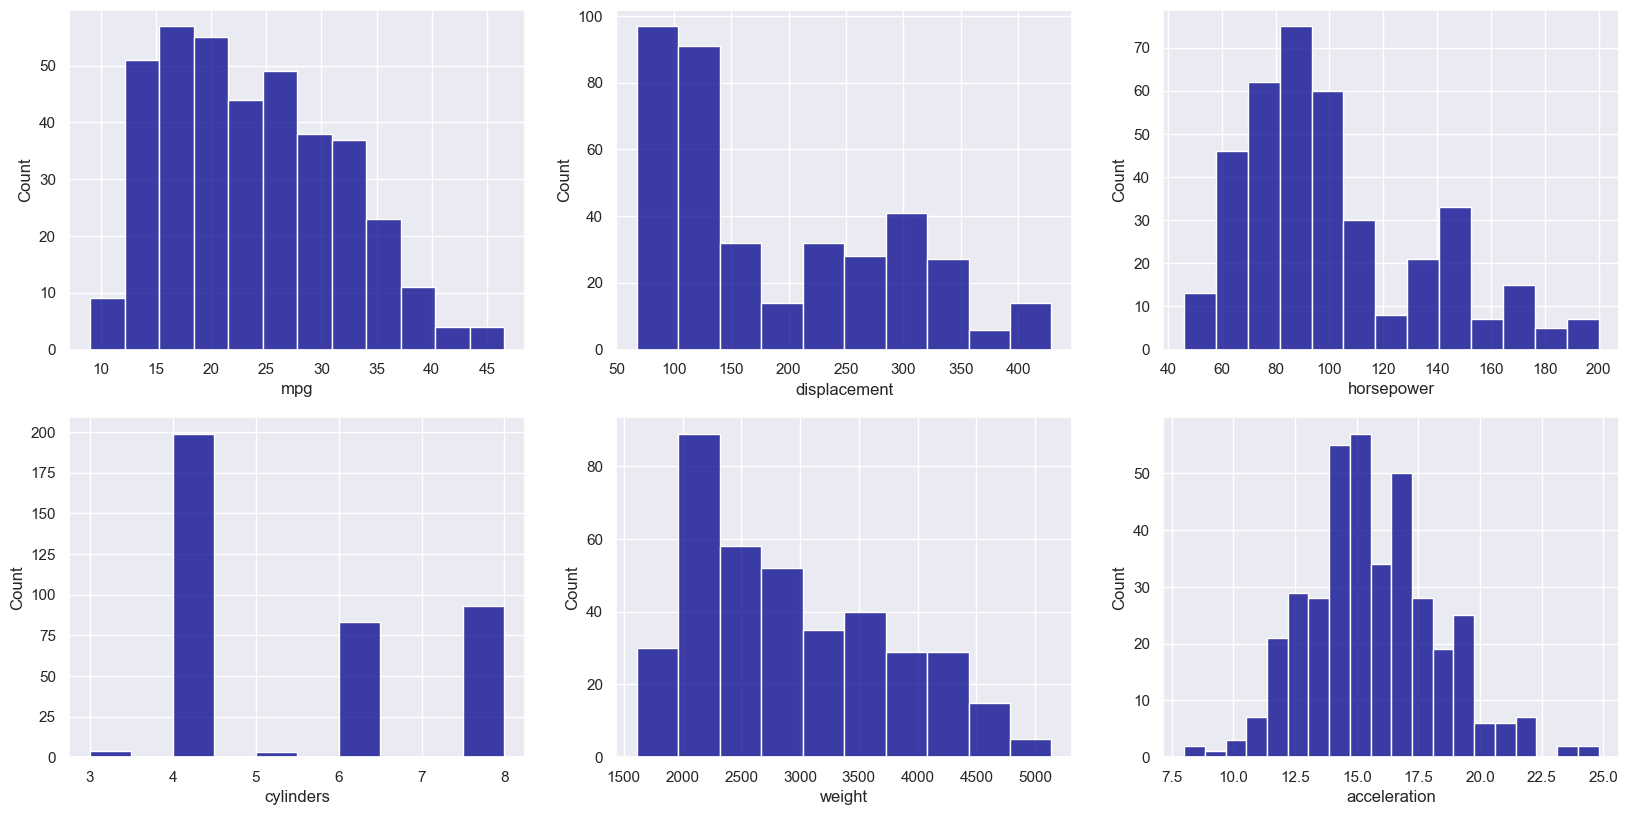

In [77]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.histplot(x= auto_no_outliers.mpg , color='darkblue')

plt.subplot(3,3,2)
sns.histplot(x= auto_no_outliers.displacement, color='darkblue')

plt.subplot(3,3,3)
sns.histplot(x= auto_no_outliers.horsepower, color='darkblue')

plt.subplot(3,3,4)
sns.histplot(x= auto_no_outliers.cylinders, color='darkblue')

plt.subplot(3,3,5)
sns.histplot(x= auto_no_outliers.weight, color='darkblue')

plt.subplot(3,3,6)
sns.histplot(x= auto_no_outliers.acceleration, color='darkblue')

plt.show()

In [60]:
# showing the skewness of variables
Skewness = pd.DataFrame({'Skewness' : [stats.skew(auto_no_outliers.displacement),stats.skew(auto_no_outliers.weight),stats.skew(auto_no_outliers.mpg),stats.skew(auto_no_outliers.horsepower),stats.skew(auto_no_outliers.cylinders)]},
                        index=['displacement','weight','mpg','horsepower','cylinders'])  # Measure the skeweness of the required columns
Skewness

,Skewness
displacement,0.679209
weight,0.548177
mpg,0.450121
horsepower,0.857835
cylinders,0.574823


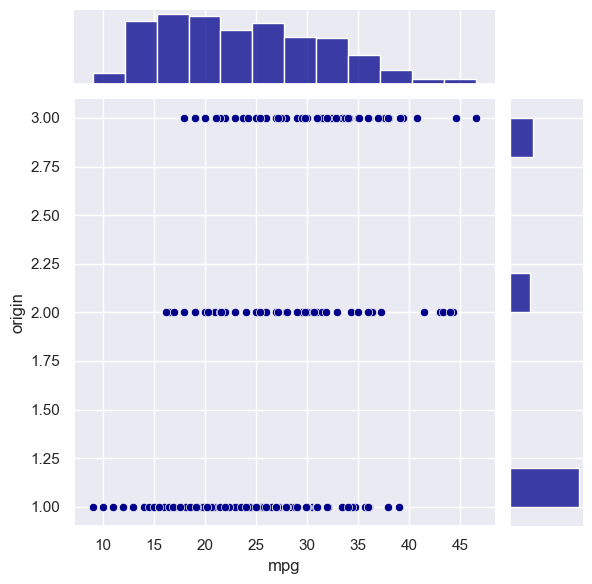

In [76]:
sns.jointplot(x='mpg' ,y='origin',kind="scatter",data=auto_no_outliers, color='darkblue')

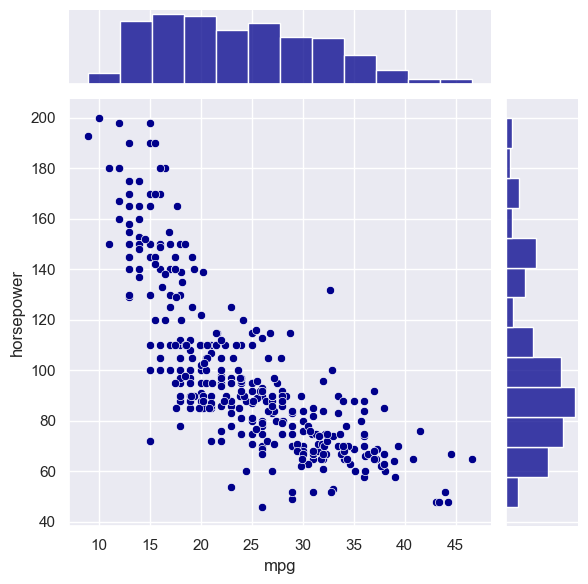

In [75]:
sns.jointplot(x='mpg' ,y='horsepower',kind="scatter",data=auto_no_outliers, color='darkblue')

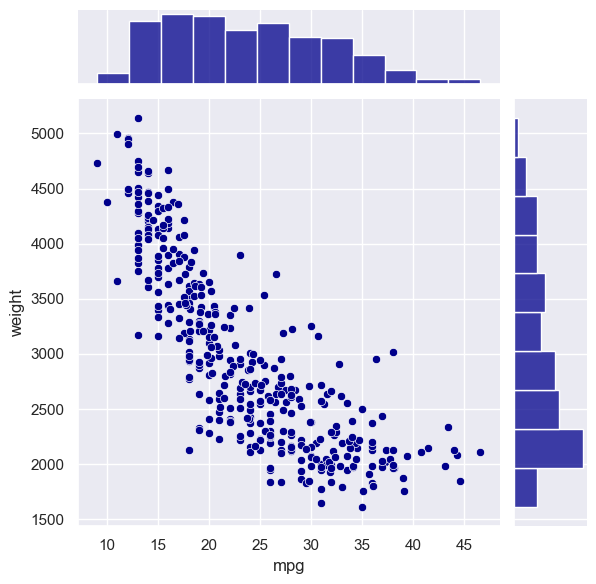

In [74]:
sns.jointplot(x='mpg' ,y='weight',kind="scatter",data=auto_no_outliers, color='darkblue')

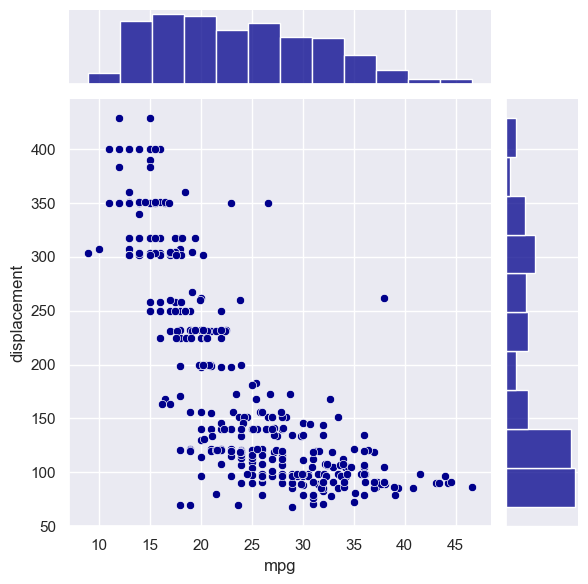

In [73]:
sns.set()
sns.jointplot(x='mpg' ,y='displacement',data=auto_no_outliers,kind="scatter", color='darkblue')

## Step 4: applying multi linear regression model

In [98]:
x = auto[["cylinders","displacement","horsepower","weight","acceleration","model_year","origin"]].values
y = auto[['mpg']].values

In [107]:
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [108]:
#scaling the feature vector
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [109]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [110]:
#Validation
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

MSE: 10.17069369566702
MAE: 2.3858493040095414
RMSE: 3.1891525042975006
r2_score: 0.807675832621031


## Accuracy is 80% but if we used another model such as polynomial regression we will get better values as the correlation between the functions is curved not linear